### Лабораторная работа №3
#### Выполнила Блистунова Валерия
#### группа М8О-401Б-18

In [2]:
# Подключаем необходимые библиотеки
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sps

Сгенерируем три пары выборок. Пусть $$X\sim R(1,4)$$ $$Y_{1}=3x+3\varepsilon$$ $$Y_{2}=2x^{2}+\varepsilon$$ $$Y_{3}=cos(x)+0.1\varepsilon$$

In [172]:
n = 100
alfa = 0.01
sp_list = []
for i in range(n):
    tmp_sp = 0
    T = sps.uniform(loc=1, scale=3).rvs(size=n)
    X = []
    for t in T:
        X.append(t)
    T = sps.norm(loc=0, scale=1).rvs(size=n)
    E = []
    for t in T:
        E.append(t)
    Y1 = []
    Y2 = []
    Y3 = []
    for i in range(n):
        Y1.append(3*X[i]+3*E[i])
        Y2.append(2*(X[i])**2+E[i])
        Y3.append(np.cos(X[i])+0.1*E[i])

    sp_stat, sp_p = sps.spearmanr(X, Y1)
    if(sp_p > alfa):
        tmp_sp = tmp_sp + 1
    sp_list.append(tmp_sp/n)

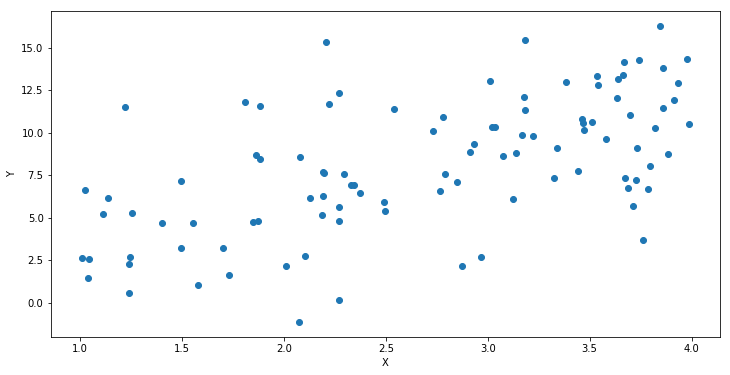

SpearmanrResult(correlation=0.6011161116111611, pvalue=3.7764867019934057e-11)

In [173]:
plt.figure(figsize=(12,6))
plt.scatter(X,Y1)
plt.xlabel('X')
plt.ylabel('Y')
plt.show()
sps.spearmanr(X, Y1)

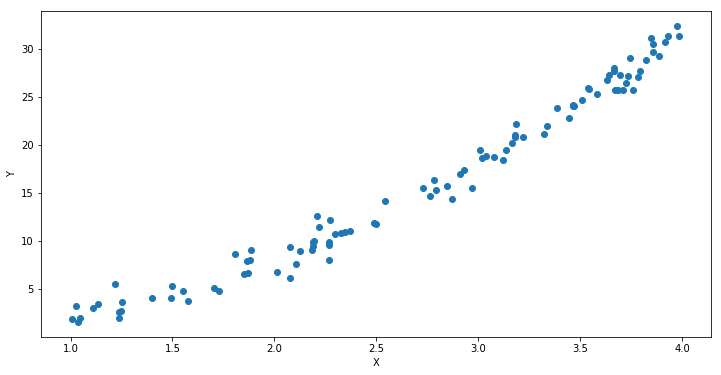

SpearmanrResult(correlation=0.9902670267026702, pvalue=9.551425558348323e-86)

In [174]:
plt.figure(figsize=(12,6))
plt.scatter(X,Y2)
plt.xlabel('X')
plt.ylabel('Y')
plt.show()
sps.spearmanr(X, Y2)

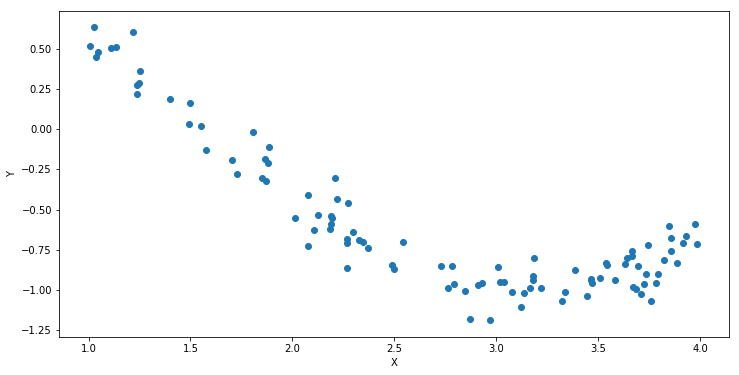

SpearmanrResult(correlation=-0.69011701170117, pvalue=1.9872543301470233e-15)

In [175]:
plt.figure(figsize=(12,6))
plt.scatter(X,Y3)
plt.xlabel('X')
plt.ylabel('Y')
plt.show()
sps.spearmanr(X, Y3)